In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chisquare
import numpy as np
from matplotlib.patches import Patch
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [2]:
file_path = "/content/SuperStore_Orders.csv"  # Ganti sesuai path lokal kamu jika berbeda
df = pd.read_csv(file_path, encoding='ISO-8859-1')

In [ ]:
# Konversi kolom numerik ke tipe float
df['sales'] = pd.to_numeric(df['sales'], errors='coerce')
df['profit'] = pd.to_numeric(df['profit'], errors='coerce')
df['discount'] = pd.to_numeric(df['discount'], errors='coerce')
df['shipping_cost'] = pd.to_numeric(df['shipping_cost'], errors='coerce')

# **Chi-Squared Goodness of Fit**

In [ ]:
#Fungsi: Chi-Square Goodness of Fit + Visualisasi (kategori)
def chi_square_category_plot(df):
    category_counts = df['category'].value_counts().sort_index()
    total_orders = category_counts.sum()
    expected_counts = [total_orders / len(category_counts)] * len(category_counts)

    chi2_stat, p_value = chisquare(f_obs=category_counts, f_exp=expected_counts)

    print("=== CHI-SQUARED GOODNESS OF FIT TEST - KATEGORI ===")
    print("Jumlah aktual kategori produk:\n", category_counts)
    print("\nJumlah harapan (merata):", expected_counts)
    print(f"\nChi-Square = {chi2_stat:.2f}")
    print(f"p-value = {p_value:.20f}")

    plt.figure(figsize=(8, 5))
    plt.bar(category_counts.index, category_counts.values, label='Actual', alpha=0.7)
    plt.axhline(y=expected_counts[0], color='red', linestyle='--', label='Expected (Uniform Distribution)')
    plt.title('Perbandingan Distribusi Kategori Produk')
    plt.xlabel('Kategori Produk')
    plt.ylabel('Jumlah Pesanan')
    plt.legend()
    plt.tight_layout()
    plt.show()

In [ ]:
# Fungsi: Chi-Square Goodness of Fit + Horizontal Plot (sub-category)
def chi_square_subcategory_plot(df):
    quantity_per_subcategory = df.groupby('sub_category')['quantity'].sum().sort_values(ascending=True)
    total_quantity = quantity_per_subcategory.sum()
    expected_quantity = [total_quantity / len(quantity_per_subcategory)] * len(quantity_per_subcategory)

    chi2_stat, p_value = chisquare(f_obs=quantity_per_subcategory, f_exp=expected_quantity)

    subcategory_to_category = df[['sub_category', 'category']].drop_duplicates().set_index('sub_category')['category']
    colors = {'Furniture': '#1f77b4', 'Office Supplies': '#2ca02c', 'Technology': '#ff7f0e'}
    subcategory_colors = [colors[subcategory_to_category[sub]] for sub in quantity_per_subcategory.index]

    print("=== CHI-SQUARED GOODNESS OF FIT TEST - QUANTITY per SUB-CATEGORY ===")
    print("Quantity aktual per sub-kategori:\n", quantity_per_subcategory)
    print("\nQuantity harapan (merata):", expected_quantity)
    print(f"\nChi-Square = {chi2_stat:.2f}")
    print(f"p-value = {p_value:.6f}")

    x = np.arange(len(quantity_per_subcategory))
    actual_values = quantity_per_subcategory.values
    expected_value = expected_quantity[0]

    plt.figure(figsize=(10, 10))
    plt.barh(y=x, width=actual_values, color=subcategory_colors, alpha=0.8)
    plt.axvline(x=expected_value, color='red', linestyle='--', label='Expected (Uniform Quantity)')
    plt.yticks(ticks=x, labels=quantity_per_subcategory.index)
    plt.xlabel('Total Quantity Terjual')
    plt.ylabel('Sub-Kategori Produk')
    plt.title('Horizontal Bar: Actual Quantity vs Expected per Sub-Kategori')

    legend_handles = [Patch(color=color, label=cat) for cat, color in colors.items()]
    legend_handles.insert(0, Patch(color='red', label='Expected (Uniform Quantity)', linestyle='--'))
    plt.legend(handles=legend_handles)
    plt.tight_layout()
    plt.show()


=== CHI-SQUARED GOODNESS OF FIT TEST - KATEGORI ===
Jumlah aktual kategori produk:
 category
Furniture           9876
Office Supplies    31273
Technology         10141
Name: count, dtype: int64

Jumlah harapan (merata): [np.float64(17096.666666666668), np.float64(17096.666666666668), np.float64(17096.666666666668)]

Chi-Square = 17634.30
p-value = 0.00000000000000000000


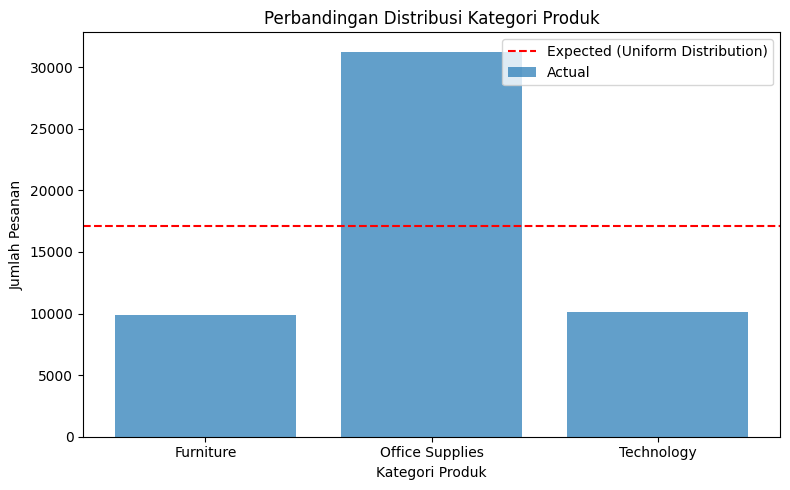

=== CHI-SQUARED GOODNESS OF FIT TEST - QUANTITY per SUB-CATEGORY ===
Quantity aktual per sub-kategori:
 sub_category
Tables          3083
Machines        4906
Appliances      6078
Copiers         7454
Bookcases       8310
Envelopes       8380
Fasteners       8390
Supplies        8543
Labels          9322
Accessories    10946
Furnishings    11225
Phones         11870
Chairs         12336
Paper          12822
Art            16301
Storage        16917
Binders        21429
Name: quantity, dtype: int64

Quantity harapan (merata): [np.float64(10488.941176470587), np.float64(10488.941176470587), np.float64(10488.941176470587), np.float64(10488.941176470587), np.float64(10488.941176470587), np.float64(10488.941176470587), np.float64(10488.941176470587), np.float64(10488.941176470587), np.float64(10488.941176470587), np.float64(10488.941176470587), np.float64(10488.941176470587), np.float64(10488.941176470587), np.float64(10488.941176470587), np.float64(10488.941176470587), np.float64(10488.941

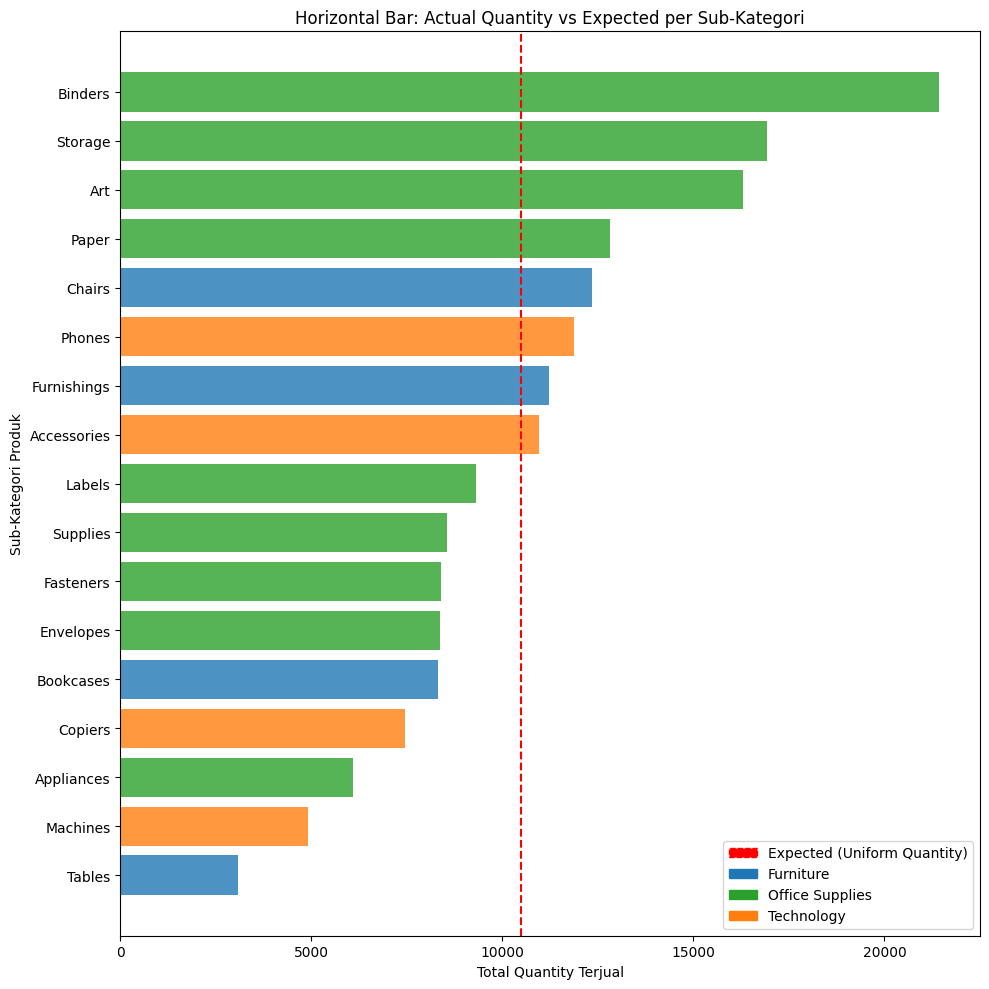

In [ ]:
chi_square_category_plot(df)
chi_square_subcategory_plot(df)

# **Chi-Squared Test of Independence**

In [ ]:
# Category
import pandas as pd
from scipy.stats import chi2_contingency, chi2

# Fungsi lengkap dengan nilai Chi-Square hitung dan tabel
def chi_square_full(col1, col2, df, alpha=0.05):
    # Buat tabel kontingensi
    ct = pd.crosstab(df[col1], df[col2])

    # Uji Chi-Square
    chi2_stat, p_val, dof, expected = chi2_contingency(ct)
    chi2_critical = chi2.ppf(1 - alpha, df=dof)

    # Cetak hasil
    print(f"\n======= {col1} vs {col2} =======")
    print("Contingency Table:")
    print(ct)
    print(f"\nChi-Squared Hitung : {chi2_stat:.4f}")
    print(f"Chi-Squared Tabel  : {chi2_critical:.4f} (α = {alpha}, df = {dof})")
    print(f"p-value            : {p_val:.4f}")

    if chi2_stat > chi2_critical:
        print("❗ Tolak H0 → Ada hubungan signifikan antara variabel.")
    else:
        print("✅ Gagal Tolak H0 → Tidak cukup bukti ada hubungan.")

    return ct, chi2_stat, chi2_critical, p_val

# List variabel target yang ingin diuji terhadap 'category'
target_columns = [
    'segment',
    'order_priority',
    'region',
    'ship_mode',
    'country',
    'ship_date',
    'market',
    'sub_category'
]

# Looping seluruh uji
for col in target_columns:
    chi_square_full('category', col, df)

# Analisis numerik: rata-rata per kategori
print("\n======= Analisis Numerik: Rata-rata per Kategori =======")
group_stats = df.groupby('category')[['sales', 'profit', 'discount', 'shipping_cost']].mean()
print(group_stats)



======= category vs segment =======
Contingency Table:
segment          Consumer  Corporate  Home Office
category                                         
Furniture            5095       3014         1767
Office Supplies     16151       9364         5758
Technology           5272       3051         1818

Chi-Squared Hitung : 2.7235
Chi-Squared Tabel  : 9.4877 (α = 0.05, df = 4)
p-value            : 0.6051
✅ Gagal Tolak H0 → Tidak cukup bukti ada hubungan.

======= category vs order_priority =======
Contingency Table:
order_priority   Critical  High   Low  Medium
category                                     
Furniture             722  2931   477    5746
Office Supplies      2446  9466  1487   17874
Technology            764  3104   460    5813

Chi-Squared Hitung : 6.7773
Chi-Squared Tabel  : 12.5916 (α = 0.05, df = 6)
p-value            : 0.3419
✅ Gagal Tolak H0 → Tidak cukup bukti ada hubungan.

======= category vs region =======
Contingency Table:
region           Africa  Canada  Ca

In [ ]:
# Sub-Category

# Looping seluruh uji
for col in target_columns:
    chi_square_full('sub_category', col, df)

# Analisis numerik: rata-rata per kategori
print("\n======= Analisis Numerik: Rata-rata per Kategori =======")
group_stats = df.groupby('sub_category')[['sales', 'profit', 'discount', 'shipping_cost']].mean()
print(group_stats)



======= sub_category vs segment =======
Contingency Table:
segment       Consumer  Corporate  Home Office
sub_category                                  
Accessories       1586        932          557
Appliances         902        557          296
Art               2588       1395          900
Binders           3233       1845         1074
Bookcases         1235        750          426
Chairs            1766       1032          636
Copiers           1161        662          400
Envelopes         1261        731          443
Fasteners         1244        720          456
Furnishings       1662        950          558
Labels            1367        754          485
Machines           796        415          275
Paper             1761       1066          711
Phones            1729       1042          586
Storage           2628       1506          925
Supplies          1167        790          468
Tables             432        282          147

Chi-Squared Hitung : 47.5982
Chi-Squared Tabel

# **Chi-Squared Test of Homogeneity**


In [5]:
import pandas as pd
from scipy.stats import chi2_contingency, chi2
import matplotlib.pyplot as plt

# Baca data
df = pd.read_csv("SuperStore_Orders.csv", encoding='ISO-8859-1')

# Daftar variabel yang ingin dibandingkan
dep_var_list = ['region', 'market', 'segment']
indep_var_list = ['category', 'sub_category']

def chi_square_test(df, row_var, col_var):
    print(f"\n=== Chi-Square Test: {row_var} vs {col_var} ===")

    # Tabel kontingensi
    table = pd.crosstab(df[row_var], df[col_var])

    # Uji chi-square
    chi2_stat, p, dof, expected = chi2_contingency(table)
    chi2_tabel = chi2.ppf(q=0.95, df=dof)

    # Output
    print("\nTabel Kontingensi:")
    print(table)
    print(f"\nChi-Square Statistic : {chi2_stat:.4f}")
    print(f"Degrees of Freedom    : {dof}")
    print(f"Chi-Square Tabel (α=0.05): {chi2_tabel:.4f}")
    print(f"P-Value               : {p:.4f}")
    print("\nExpected Frequencies:")
    print(pd.DataFrame(expected, index=table.index, columns=table.columns))

    # Kesimpulan
    if p < 0.05:
        print("\n🔴 Tolak H0: Tidak homogen / ada hubungan antara variabel.")
    else:
        print("\n🟢 Gagal tolak H0: Homogen / tidak ada hubungan yang signifikan.")

    # Grafik
    table.plot(kind='bar', figsize=(10, 6))
    plt.title(f'Distribusi {col_var.replace("_", " ").title()} per {row_var.title()}')
    plt.xlabel(row_var.title())
    plt.ylabel('Jumlah')
    plt.legend(title=col_var.replace("_", " ").title())
    plt.xticks(fontsize=8, rotation=0)
    plt.tight_layout()
    plt.show()



=== Chi-Square Test: region vs category ===

Tabel Kontingensi:
category        Furniture  Office Supplies  Technology
region                                                
Africa                631             3045         911
Canada                 42              277          65
Caribbean             376              973         341
Central              2046             6936        2135
Central Asia          478             1111         459
EMEA                  770             3297         962
East                  601             1712         535
North                 945             2914         926
North Asia            522             1332         484
Oceania               742             1961         784
South                1329             4045        1271
Southeast Asia        687             1773         669
West                  707             1897         599

Chi-Square Statistic : 342.4664
Degrees of Freedom    : 24
Chi-Square Tabel (α=0.05): 36.4150
P-Value        

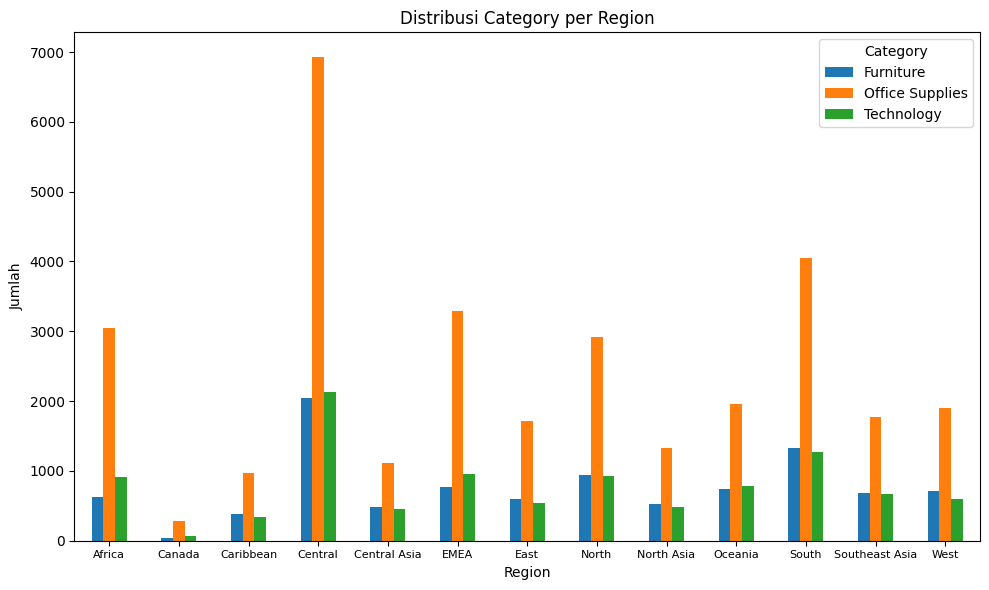


=== Chi-Square Test: region vs sub_category ===

Tabel Kontingensi:
sub_category    Accessories  Appliances   Art  Binders  Bookcases  Chairs  \
region                                                                      
Africa                  232         146   619      612        196     183   
Canada                   19          16    62       62         13      12   
Caribbean               102          53    84      171         94     160   
Central                 671         408  1189     1418        515     704   
Central Asia            130          55   109      192        127     180   
EMEA                    240         154   696      695        222     250   
East                    206         126   228      440         70     168   
North                   252         140   480      543        266     348   
North Asia              133          68   145      201        143     209   
Oceania                 250         107   213      303        191     312   
South  

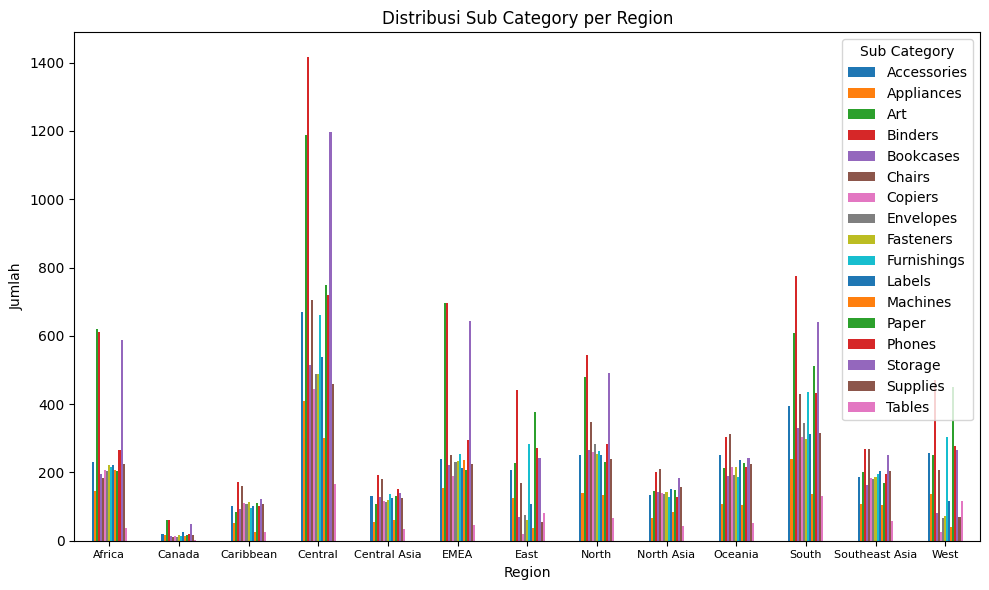


=== Chi-Square Test: market vs category ===

Tabel Kontingensi:
category  Furniture  Office Supplies  Technology
market                                          
APAC           2429             6177        2396
Africa          631             3045         911
Canada           42              277          65
EMEA            770             3297         962
EU             1501             6589        1910
LATAM          2382             5862        2050
US             2121             6026        1847

Chi-Square Statistic : 559.2533
Degrees of Freedom    : 12
Chi-Square Tabel (α=0.05): 21.0261
P-Value               : 0.0000

Expected Frequencies:
category    Furniture  Office Supplies   Technology
market                                             
APAC      2118.458803      6708.238370  2175.302827
Africa     883.236732      2796.826886   906.936381
Canada      73.940027       234.135933    75.924040
EMEA       968.344785      3066.327101   994.328115
EU        1925.521544      6097.2

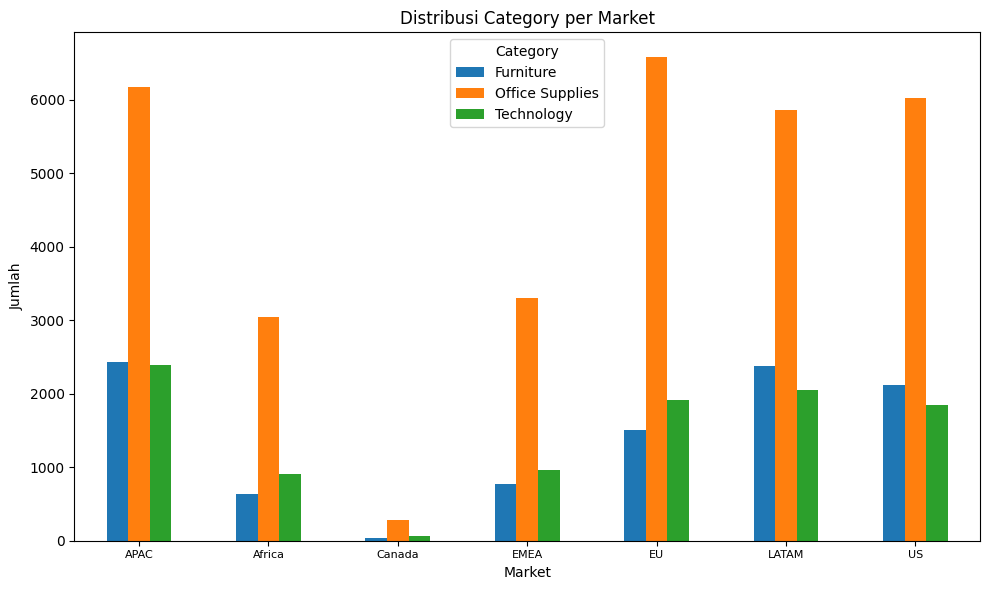


=== Chi-Square Test: market vs sub_category ===

Tabel Kontingensi:
sub_category  Accessories  Appliances   Art  Binders  Bookcases  Chairs  \
market                                                                    
APAC                  699         338   668      965        624     971   
Africa                232         146   619      612        196     183   
Canada                 19          16    62       62         13      12   
EMEA                  240         154   696      695        222     250   
EU                    452         312  1434     1317        484     465   
LATAM                 658         323   608      978        644     936   
US                    775         466   796     1523        228     617   

sub_category  Copiers  Envelopes  Fasteners  Furnishings  Labels  Machines  \
market                                                                       
APAC              652        623        662          645     715       356   
Africa            206

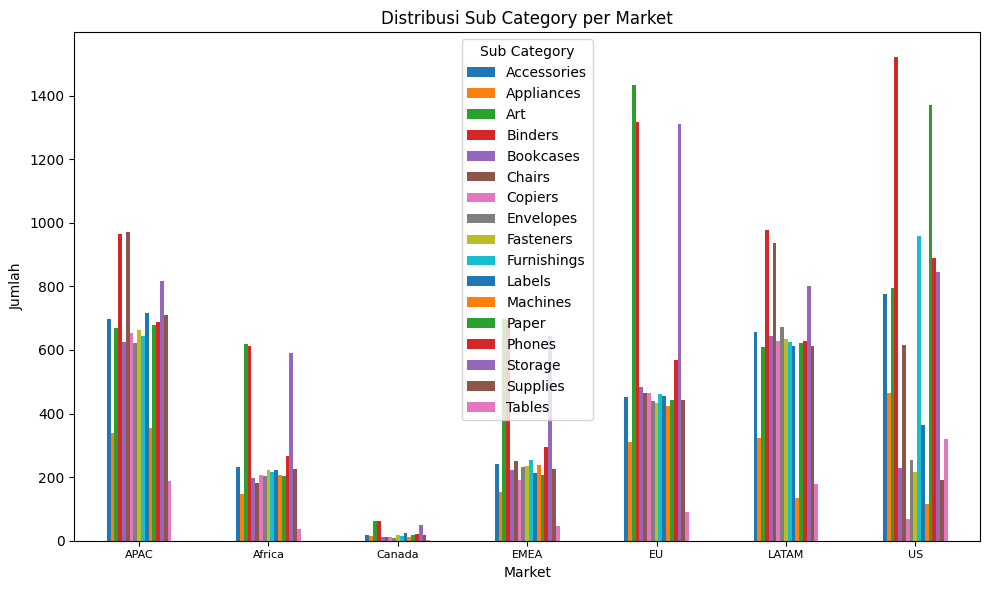


=== Chi-Square Test: segment vs category ===

Tabel Kontingensi:
category     Furniture  Office Supplies  Technology
segment                                            
Consumer          5095            16151        5272
Corporate         3014             9364        3051
Home Office       1767             5758        1818

Chi-Square Statistic : 2.7235
Degrees of Freedom    : 4
Chi-Square Tabel (α=0.05): 9.4877
P-Value               : 0.6051

Expected Frequencies:
category       Furniture  Office Supplies   Technology
segment                                               
Consumer     5106.098031     16168.793410  5243.108559
Corporate    2970.887190      9407.508618  3050.604192
Home Office  1799.014779      5696.697972  1847.287249

🟢 Gagal tolak H0: Homogen / tidak ada hubungan yang signifikan.


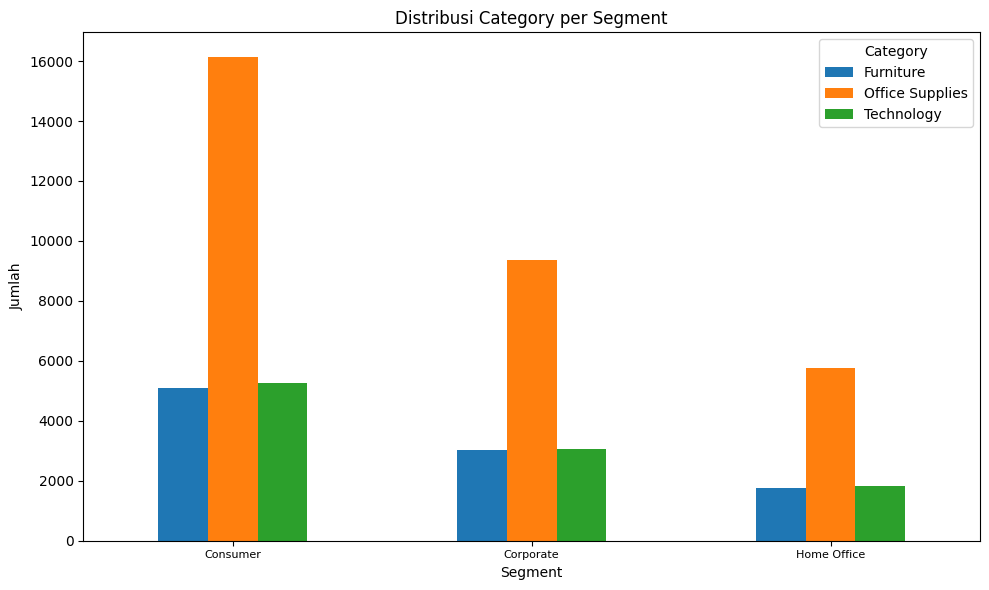


=== Chi-Square Test: segment vs sub_category ===

Tabel Kontingensi:
sub_category  Accessories  Appliances   Art  Binders  Bookcases  Chairs  \
segment                                                                   
Consumer             1586         902  2588     3233       1235    1766   
Corporate             932         557  1395     1845        750    1032   
Home Office           557         296   900     1074        426     636   

sub_category  Copiers  Envelopes  Fasteners  Furnishings  Labels  Machines  \
segment                                                                      
Consumer         1161       1261       1244         1662    1367       796   
Corporate         662        731        720          950     754       415   
Home Office       400        443        456          558     485       275   

sub_category  Paper  Phones  Storage  Supplies  Tables  
segment                                                 
Consumer       1761    1729     2628      1167   

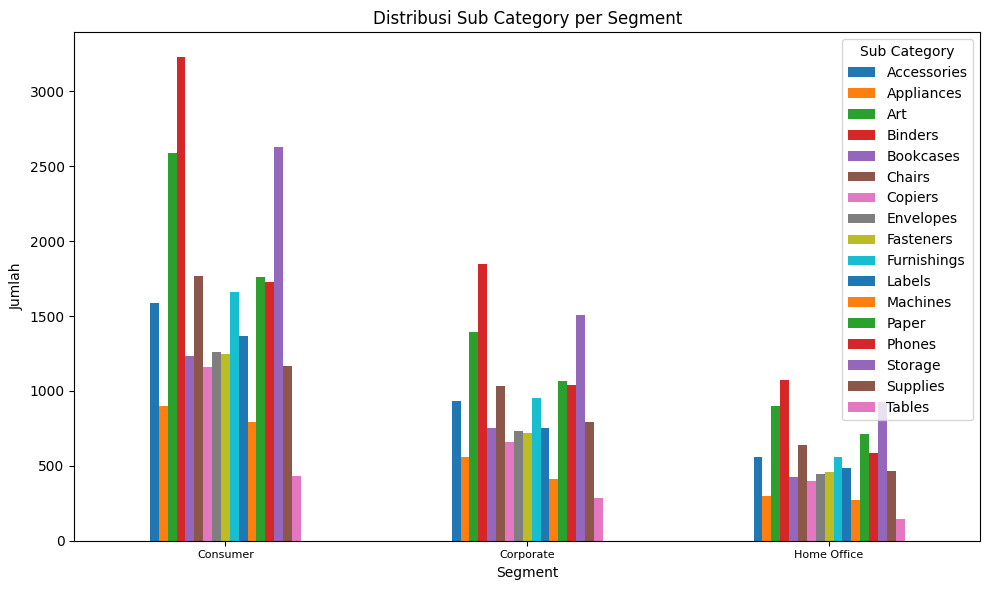

In [6]:
# Loop semua kombinasi dep_var vs indep_var
def run_all_chi_square(df, dep_list, indep_list):
    for dep in dep_list:
        for indep in indep_list:
            chi_square_test(df, row_var=dep, col_var=indep)

run_all_chi_square(df, dep_var_list, indep_var_list)